In [1]:
import zipfile
from glob import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from pathlib import Path
import seaborn as sns

## Download data

unzip the file with json metafiles to the directory 'Meta'

In [ ]:
!unzip /content/drive/MyDrive/Roadly/meta.zip -d /content/drive/MyDrive/Roadly/

creating the list of paths to json files in directory

In [ ]:
path_to_json_files = 'smth'
filepaths = glob(path_to_json_files + '/*.json') # get list of json files in folder
len(filepaths) # get the number of json files

In [ ]:
files = glob.glob(path_to_json_files)

## Creating an annotation CSV file

Get dataframe from multiple json files, create 'file_name' column from json file name.

In [ ]:
import json
#import codecs

In [ ]:
combined_results = []
for file in filepaths:
    f = open(file, 'r')
    combined_results.append(json.load(f))

pd.DataFrame(combined_results)

In [ ]:
meta_df.info()

Save meta_df in csv format.

In [ ]:
meta_df.to_csv('meta.csv')

## Compare image file names and metadata files

loading meta data from csv, check for duplicates

In [ ]:
meta_df = pd.read_csv('meta.csv')
data_df = meta_df.copy()
meta_df.head(3)

,Unnamed: 0.1,Unnamed: 0,class_label,severity_label,job,frame,validated,file_name
0,0,0,crack_longitudinal,medium,3640,1102,False,3640_1102_21
1,1,1,crack_longitudinal,low,3394,275,False,3394_275_52
2,2,2,raveling,high,3352,640,False,3352_640_16


In [ ]:
print(len(data_df['file_name']))
d = data_df.drop_duplicates(subset = 'file_name', ignore_index=True) # check for duplicates
len(d['file_name'])

45466


45466

getting the list of image names, checking for duplicates

In [ ]:
path_to_images = 'path_to_images'
filepaths_img = glob(path_to_images + '/*.png') # get list of png files in folder
print(len(filepaths_img)) # get the number of png files
file_names_img = [os.path.basename(img_path) for img_path in filepaths_img]
file_names_img_dupldrop = list(set(file_names_img)) # check for duplicates
len(file_names_img_dupldrop)

44778


44778

checking for meta data files that don't correspond to the image files and remove them from the dataframe

In [ ]:
data_df['file_name'] = data_df['file_name'].apply(lambda x: x + '.png')
data_df['file_name'] = data_df['file_name'].apply(lambda x: x if x in file_names_img else 'absent_img')


In [ ]:
data_df = data_df[data_df.file_name != 'absent_img']
data_df.index = range(len(data_df))
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44778 entries, 0 to 44777
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    44778 non-null  int64 
 1   Unnamed: 0      44778 non-null  int64 
 2   class_label     44778 non-null  object
 3   severity_label  44778 non-null  object
 4   job             44778 non-null  int64 
 5   frame           44778 non-null  int64 
 6   validated       44778 non-null  bool  
 7   file_name       44778 non-null  object
dtypes: bool(1), int64(4), object(3)
memory usage: 2.4+ MB


saving new dataframe to csv for using it as annotation file in dataset_loader

In [ ]:
data_df.head(3)

,Unnamed: 0.1,Unnamed: 0,class_label,severity_label,job,frame,validated,file_name
0,0,0,crack_longitudinal,medium,3640,1102,False,3640_1102_21.png
1,1,1,crack_longitudinal,low,3394,275,False,3394_275_52.png
2,2,2,raveling,high,3352,640,False,3352_640_16.png


In [ ]:
data_df.to_csv('meta_medium.csv')

## Data analysis

checking for class balance

In [3]:
meta_medium_df = pd.read_csv('meta_medium.csv')
data_df = meta_medium_df.copy()

In [4]:
data_df.columns.values

array(['Unnamed: 0', 'class_label', 'severity_label', 'job', 'frame',
       'validated', 'file_name'], dtype=object)

In [6]:
data_df.drop(columns = ['Unnamed: 0'], inplace = True)
data_df.head()

,class_label,severity_label,job,frame,validated,file_name
0,crack_longitudinal,medium,3640,1102,False,3640_1102_21.png
1,crack_longitudinal,low,3394,275,False,3394_275_52.png
2,raveling,high,3352,640,False,3352_640_16.png
3,patches,low,3592,364,True,3592_364_44.png
4,crack_alligator_area,high,3328,523,False,3328_523_16.png


In [ ]:
data_df.to_csv('/content/drive/MyDrive/Roadly/meta_medium.csv')

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/Roadly/meta_medium.csv')

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44778 entries, 0 to 44777
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class_label     44778 non-null  object
 1   severity_label  44778 non-null  object
 2   job             44778 non-null  int64 
 3   frame           44778 non-null  int64 
 4   validated       44778 non-null  bool  
 5   file_name       44778 non-null  object
dtypes: bool(1), int64(2), object(3)
memory usage: 1.8+ MB


In [8]:
class_df = data_df.groupby(['class_label']).agg({
    'job':'nunique',
    'validated':'sum',
    'file_name': 'count'
}).reset_index().rename(columns={'job': 'job_count', 'validated': 'validated_count', 'file_name': 'file_count'})

In [10]:
class_df['validation_percent'] = class_df['validated_count']/class_df['file_count']*100
class_df

,class_label,job_count,validated_count,file_count,validation_percent
0,crack_alligator_area,77,40,785,5.095541
1,crack_longitudinal,258,1735,19572,8.864705
2,crack_reflection,50,0,1847,0.000000
3,crack_transversal,238,1702,13198,12.895893
4,patches,198,939,5692,16.496838
5,pothole,173,27,2149,1.256398
6,raveling,95,46,1535,2.996743


In [ ]:
data_df[data_df['validated'] == 1].job.value_counts().nlargest(15)

In [29]:
data_df[data_df['job'] == 3599].validated.value_counts().nlargest()

validated
True    193
Name: count, dtype: int64

In [11]:
job_df = data_df.groupby(['job']).agg({
    'class_label':'nunique',
    'validated':'sum',
    'file_name': 'count'
}).reset_index().rename(columns={'class_label': 'class_label', 'validated': 'validated_count', 'file_name': 'file_count'})

In [28]:
job_df[job_df['validated_count'] != 0].head(15)

,job,class_label,validated_count,file_count
162,3589,6,326,326
163,3590,4,764,764
164,3591,5,386,386
165,3592,4,567,567
166,3593,3,504,504
167,3594,4,504,504
168,3595,3,141,141
169,3596,6,389,389
170,3597,6,327,327
171,3598,6,388,388


In [35]:
data_df[data_df.validated == 1].file_name.count()

4489

In [46]:
validated_df = data_df[data_df.validated == 1]

In [ ]:
data_df[data_df.job == 3402].class_label.value_counts().nlargest(7)

crack_longitudinal    1609
crack_transversal      234
patches                 16
Name: class_label, dtype: int64

In [ ]:
data_df[data_df.job == 3402].validated.value_counts().nlargest()

False    1859
Name: validated, dtype: int64

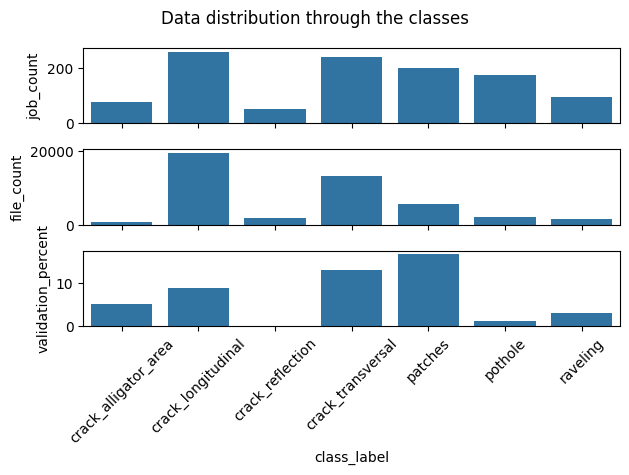

In [ ]:
#
fig, axs = plt.subplots(3, sharex=True)
sns.barplot(data=class_df, x='class_label', y='job_count', ax= axs[0])
sns.barplot(data=class_df, x='class_label', y='file_count', ax= axs[1])
sns.barplot(data=class_df, x='class_label', y='validation_percent', ax= axs[2])

fig.suptitle('Data distribution through the classes')
axs[2].xaxis.set_tick_params(rotation=45)
fig.tight_layout();

In [51]:
job_df[job_df['class_label'] == 7].sort_values(by = 'file_count', ascending=False).head(10)

,job,class_label,validated_count,file_count
48,3387,7,0,350
47,3386,7,0,299
53,3393,7,0,287
77,3418,7,0,287
74,3415,7,0,194


In [55]:
cr_refl_df=data_df[data_df.class_label == 'crack_reflection'].groupby('job').agg({'validated':'sum',
    'file_name': 'count'}
).reset_index().rename(columns={'validated': 'validated_count', 'file_name': 'file_count'})
cr_refl_df.sort_values(by = 'file_count', ascending=False).head()

,job,validated_count,file_count
8,3351,0,163
16,3384,0,125
15,3383,0,122
14,3382,0,98
9,3352,0,89


In [61]:
data_df[data_df.job == 3384].class_label.value_counts().nlargest(7)

class_label
crack_reflection      125
pothole                15
crack_longitudinal      8
crack_transversal       6
Name: count, dtype: int64

In [62]:
val_df = pd.concat([validated_df, data_df[data_df.job == 3384], data_df[data_df.job == 3352]])

In [67]:
val_df.head()

,class_label,severity_label,job,frame,validated,file_name
3,patches,low,3592,364,True,3592_364_44.png
5,crack_transversal,low,3596,115,True,3596_115_19.png
20,patches,medium,3598,696,True,3598_696_31.png
27,crack_transversal,low,3594,760,True,3594_760_14.png
34,crack_transversal,low,3599,893,True,3599_893_28.png


In [63]:
class_df1 = val_df.groupby(['class_label']).agg({
    'job':'nunique',
    'validated':'sum',
    'file_name': 'count'
}).reset_index().rename(columns={'job': 'job_count', 'validated': 'validated_count', 'file_name': 'file_count'})
class_df1

,class_label,job_count,validated_count,file_count
0,crack_alligator_area,6,40,40
1,crack_longitudinal,13,1735,1854
2,crack_reflection,2,0,214
3,crack_transversal,13,1702,1736
4,patches,12,939,941
5,pothole,9,27,53
6,raveling,8,46,58


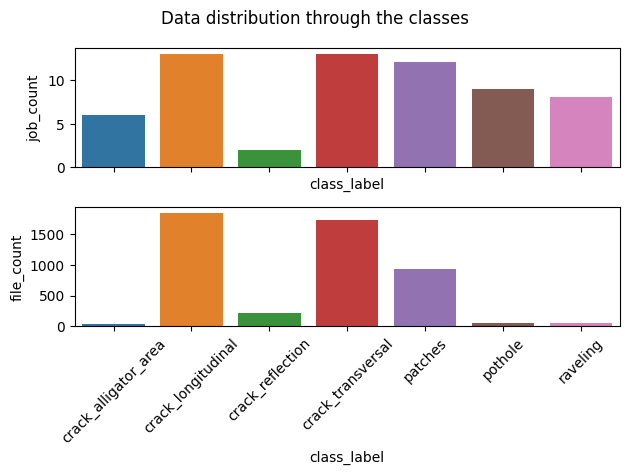

In [64]:
#
fig, axs = plt.subplots(2, sharex=True)
sns.barplot(data=class_df1, x='class_label', y='job_count', ax= axs[0])
sns.barplot(data=class_df1, x='class_label', y='file_count', ax= axs[1])
#sns.barplot(data=class_df1, x='class_label', y='validation_percent', ax= axs[2])

fig.suptitle('Data distribution through the classes')
axs[1].xaxis.set_tick_params(rotation=45)
fig.tight_layout();

In [71]:
val_index = list(val_df.index)
len(val_index)

4896

In [73]:
len(data_df)-len(val_index)

39882

In [74]:
test_df = data_df.drop(axis = 0, index = val_index)
len(test_df)

39882

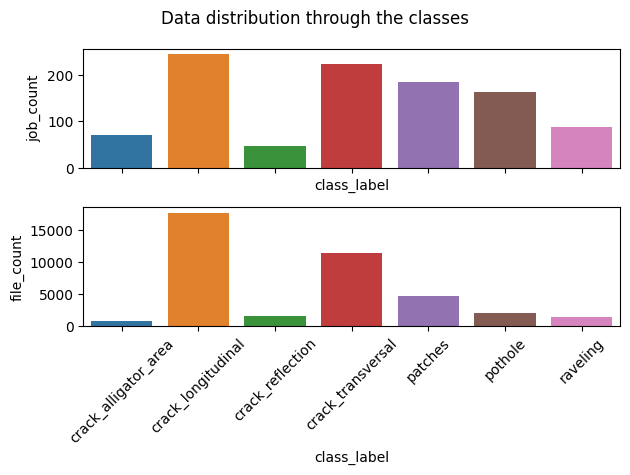

In [76]:
class_df2 = test_df.groupby(['class_label']).agg({
    'job':'nunique',
    'validated':'sum',
    'file_name': 'count'
}).reset_index().rename(columns={'job': 'job_count', 'validated': 'validated_count', 'file_name': 'file_count'})
class_df1
#
fig, axs = plt.subplots(2, sharex=True)
sns.barplot(data=class_df2, x='class_label', y='job_count', ax= axs[0])
sns.barplot(data=class_df2, x='class_label', y='file_count', ax= axs[1])
#sns.barplot(data=class_df1, x='class_label', y='validation_percent', ax= axs[2])

fig.suptitle('Data distribution through the classes')
axs[1].xaxis.set_tick_params(rotation=45)
fig.tight_layout();

In [78]:
val_job_list = list(set(val_df['job']))
val_job_list

[3352, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3384]

In [80]:
test_job_list = list(set(test_df['job']))
len(test_job_list)

270

In [82]:
# testing for data leakage, check if test and validation dataset have common jobs
def test_data_leakage(test_list, val_list):
    mask_lst = [x in test_list for x in val_list]
    return sum(mask_lst)

test_data_leakage(test_job_list, val_job_list)

0

In [83]:
# create test and val csv files
test_df.to_csv("train_data_csv")
val_df.to_csv("val_data_csv")

In [2]:
train_df = pd.read_csv('train_data_csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39882 entries, 0 to 39881
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      39882 non-null  int64 
 1   class_label     39882 non-null  object
 2   severity_label  39882 non-null  object
 3   job             39882 non-null  int64 
 4   frame           39882 non-null  int64 
 5   validated       39882 non-null  bool  
 6   file_name       39882 non-null  object
dtypes: bool(1), int64(3), object(3)
memory usage: 1.9+ MB


In [26]:
train_copy = train_df[:100]

In [34]:
i_list = train_df[(train_df['class_label']=='crack_longitudinal') & (train_df['job'] == 3402)].index
#train_copy.drop(index = i, inplace=True)
#train_copy[train_copy.index.isin(i_list)].head()
len(i_list)
i_toremove = i_list[150:]
#train_copy[train_copy.index.isin(i_toremove)].head()
len(i_toremove)

1459

In [36]:
sum(train_df['job'] == 3402)

1859

In [41]:
crackl_df = train_df[train_df['class_label']=='crack_longitudinal'].groupby('job').agg({
    'file_name': 'count'
}).reset_index().rename(columns={'file_name': 'file_count'})
crackl_df.sort_values(by = 'file_count', ascending=False)


,job,file_count
54,3402,1609
91,3440,421
92,3441,369
236,3911,329
138,3514,329
...,...,...
226,3895,1
30,3356,1
212,3876,1
210,3874,1


In [82]:
df = train_df.copy()
old_len = len(df)
remove_lst = get_index_to_remove(df)
df.drop(index = remove_lst, inplace = True)

In [83]:
len(df)

21064

In [85]:
df.to_csv('small_train_csv')

In [81]:
def get_index_to_remove(df):
    
    label_list = ['crack_longitudinal', 'crack_transversal', ]
    index_to_remove = []
    for label in label_list:
        for job in df[df.class_label == label].job:
            mask = (df.class_label == label) & (df.job == job)
            if len(df[mask])>30:
                index_list = df[mask].index
                index_to_remove.extend(index_list[30:])
            else:
                continue
    return index_to_remove            

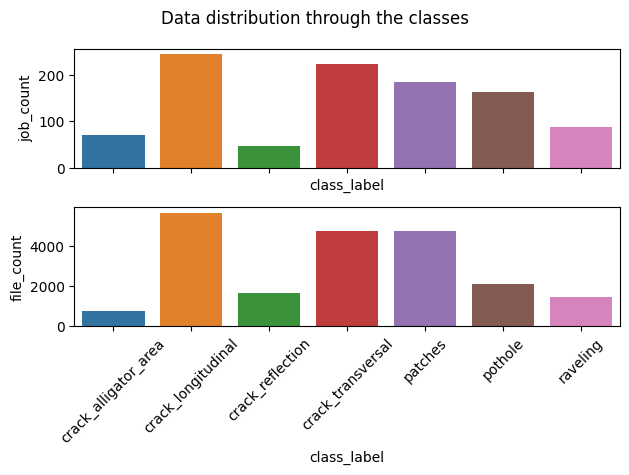

In [84]:
class_df2 = df.groupby(['class_label']).agg({
    'job':'nunique',
    'validated':'sum',
    'file_name': 'count'
}).reset_index().rename(columns={'job': 'job_count', 'validated': 'validated_count', 'file_name': 'file_count'})

#
fig, axs = plt.subplots(2, sharex=True)
sns.barplot(data=class_df2, x='class_label', y='job_count', ax= axs[0])
sns.barplot(data=class_df2, x='class_label', y='file_count', ax= axs[1])
#sns.barplot(data=class_df1, x='class_label', y='validation_percent', ax= axs[2])

fig.suptitle('Data distribution through the classes')
axs[1].xaxis.set_tick_params(rotation=45)
fig.tight_layout();

In [ ]:
def get_jobs_to_reduce(df)
    for job in df.job:
        if sum(df['job' == job])>150:
            

In [ ]:
label_list = ['crack_longitudinal', 'crack_transversal']
jobs_to_reduce = [df.job]